In [713]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [714]:
data = pd.read_csv("cbsa-counties.csv")

In [715]:
data

,cbsa_code,county_fips,county_name,state_name
0,10100,46013,Brown County,South Dakota
1,10100,46045,Edmunds County,South Dakota
2,10140,53027,Grays Harbor County,Washington
3,10180,48059,Callahan County,Texas
4,10180,48253,Jones County,Texas
...,...,...,...,...
1910,49700,6101,Sutter County,California
1911,49700,6115,Yuba County,California
1912,49740,4027,Yuma County,Arizona
1913,49780,39119,Muskingum County,Ohio


In [716]:
data.county_name

0              Brown County
1            Edmunds County
2       Grays Harbor County
3           Callahan County
4              Jones County
               ...         
1910          Sutter County
1911            Yuba County
1912            Yuma County
1913       Muskingum County
1914          Zapata County
Name: county_name, Length: 1915, dtype: object

In [717]:
data.set_index("state_name")

,cbsa_code,county_fips,county_name
state_name,,,
South Dakota,10100,46013,Brown County
South Dakota,10100,46045,Edmunds County
Washington,10140,53027,Grays Harbor County
Texas,10180,48059,Callahan County
Texas,10180,48253,Jones County
...,...,...,...
California,49700,6101,Sutter County
California,49700,6115,Yuba County
Arizona,49740,4027,Yuma County


In [718]:
alabama = data[data.state_name == "Alabama"]
alabama.head().set_index("county_name")


,cbsa_code,county_fips,state_name
county_name,,,
Marshall County,10700,1095,Alabama
Coosa County,10760,1037,Alabama
Tallapoosa County,10760,1123,Alabama
Calhoun County,11500,1015,Alabama
Escambia County,12120,1053,Alabama


In [719]:
data

,cbsa_code,county_fips,county_name,state_name
0,10100,46013,Brown County,South Dakota
1,10100,46045,Edmunds County,South Dakota
2,10140,53027,Grays Harbor County,Washington
3,10180,48059,Callahan County,Texas
4,10180,48253,Jones County,Texas
...,...,...,...,...
1910,49700,6101,Sutter County,California
1911,49700,6115,Yuba County,California
1912,49740,4027,Yuma County,Arizona
1913,49780,39119,Muskingum County,Ohio


In [720]:
# Splits up data for training/testing

training = data.iloc[:800,:]
test = data.iloc[800:,:]

test

,cbsa_code,county_fips,county_name,state_name
800,26900,18097,Marion County,Indiana
801,26900,18109,Morgan County,Indiana
802,26900,18133,Putnam County,Indiana
803,26900,18145,Shelby County,Indiana
804,26940,28133,Sunflower County,Mississippi
...,...,...,...,...
1910,49700,6101,Sutter County,California
1911,49700,6115,Yuba County,California
1912,49740,4027,Yuma County,Arizona
1913,49780,39119,Muskingum County,Ohio


Visualizing the quantity of counties based on covid exposure per state

In [721]:
# dict to hold how many counties each state has had covid outbreaks in
StateDict = {'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'}

NewStateDict = dict([(value, key) for key, value in StateDict.items()])
# NewStateDict = {x: 0 for x in StateDict}
FinalStateDict = {x: 0 for x in NewStateDict}

In [722]:
df = pd.DataFrame.from_dict(FinalStateDict, orient = 'index')
df.columns = ['# of Counties']
df.index.name = 'States'
for index, row in training.iterrows():
    state = row.state_name
    df.loc[[state],["# of Counties"]] += 1

In [723]:
df

,# of Counties
States,
Alaska,3
Alabama,28
Arkansas,20
American Samoa,0
Arizona,1
California,8
Colorado,24
Connecticut,4
District of Columbia,0


<AxesSubplot:title={'center':'# of counties exposed to Covid per State'}, xlabel='States', ylabel='# of Counties'>

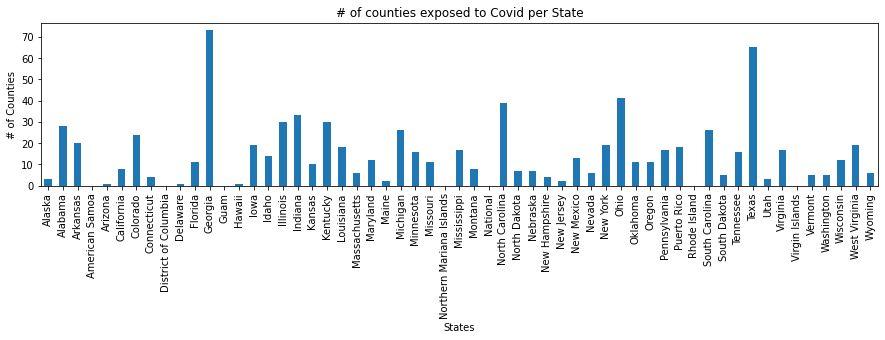

In [724]:
# df['# of Counties'].plot(kind="bar", title="test")


f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.title("# of counties exposed to Covid per State")
plt.xlabel("Family Member")
plt.ylabel("# of Counties")
df['# of Counties'].plot(kind="bar", title="# of counties exposed to Covid per State")

In [725]:
zeroes_not_allowed = ['# of Counties']


for column in zeroes_not_allowed:
    df[column] = df[column].replace(0, np.NaN)
    mean = df[column].mean(skipna=True)
    df[column] = df[column].replace(np.NaN, mean)
# print(df)    
# my_array = df

Sorted_df = pd.DataFrame(df, columns = zeroes_not_allowed)
# Sorted_df = pd.DataFrame(imp.em(df))

# print(df[column])

In [726]:
# Sorted_df['# of Counties'] = Sorted_df['# of Counties'].astype(int)
# df.loc[:, ['# of Counties']] = Sorted_df[['# of Counties']]
Sorted_df.sort_values(by=['# of Counties'])

,# of Counties
States,
Arizona,1.0
Delaware,1.0
Hawaii,1.0
New Jersey,2.0
Maine,2.0
Alaska,3.0
Utah,3.0
Connecticut,4.0
New Hampshire,4.0


<AxesSubplot:title={'center':'# of counties exposed to Covid per State in order'}, xlabel='States', ylabel='# of Counties'>

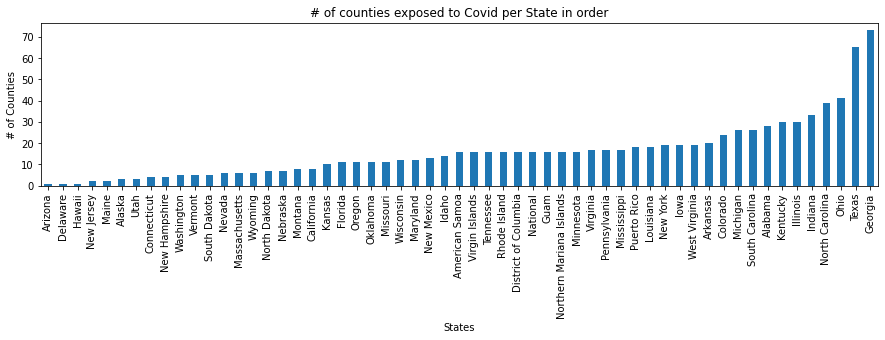

In [731]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(3)
plt.title("# of counties exposed to Covid per State")
plt.xlabel("Family Member")
plt.ylabel("# of Counties")

sorted = Sorted_df.sort_values(by=['# of Counties'])
sorted['# of Counties'].plot(kind="bar", title="# of counties exposed to Covid per State in order")